In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [280]:
#Read and Save Data
df_heart = pd.read_csv("Heart Disease DataSet.csv")
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [281]:
df_heart.astype(int) #change data type to integer

df_heart.info() #info for each feature.

#1025 data points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [282]:
df_heart.shape
#shape of dataset

(1025, 14)

In [283]:
df_heart.describe() #to get a summary of the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [284]:
#find missing values

# Check for missing values in each column
missing_values = df_heart.isnull().sum()

print(missing_values)

# Total missing values in the entire dataset
total_missing = df_heart.isnull().sum().sum()

print(f"Total missing values: {total_missing}")



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Total missing values: 0


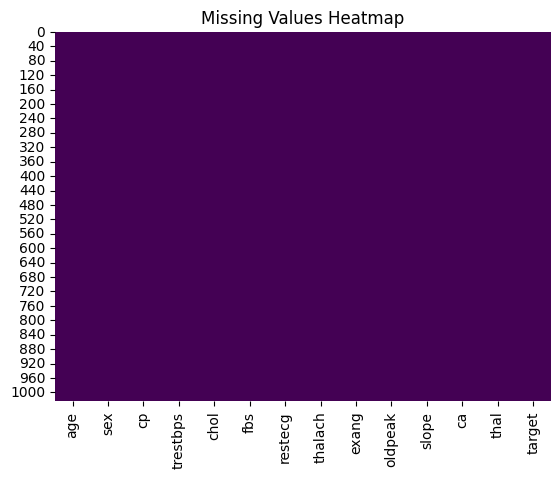

In [285]:
# Heatmap of missing values
sns.heatmap(df_heart.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


EDA (Explanatory Data Analysis);

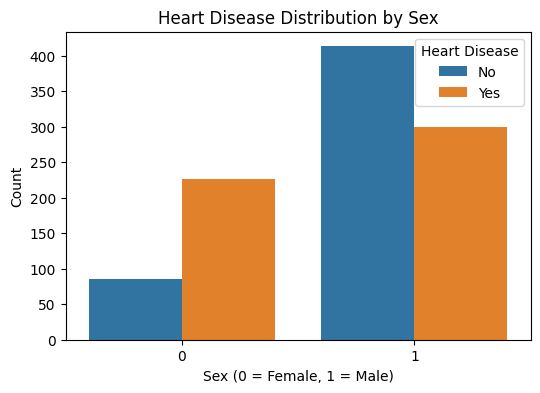

In [286]:
plt.figure(figsize=(6,4))
sns.countplot(x="sex", hue="target", data=df_heart)
plt.title("Heart Disease Distribution by Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()


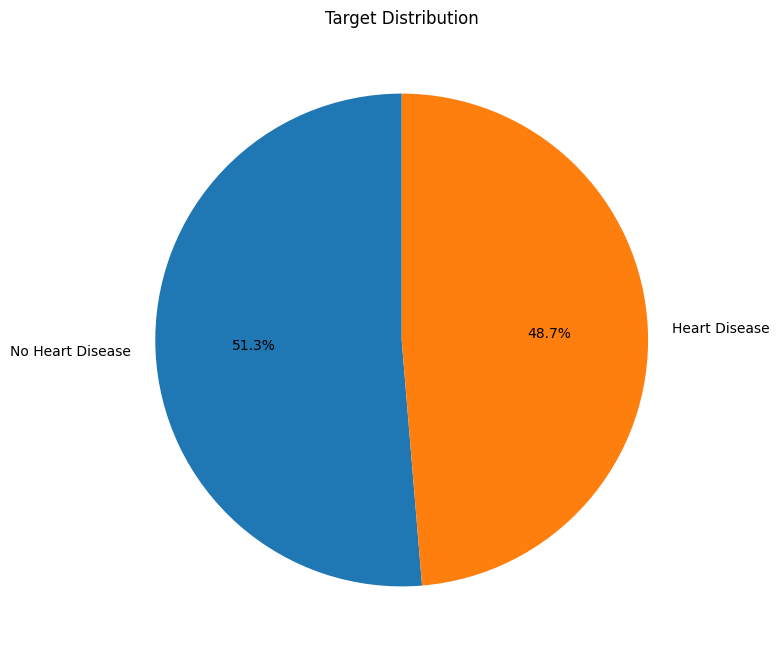

In [287]:
target_counts = df_heart["target"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=["No Heart Disease", "Heart Disease"], autopct='%1.1f%%', startangle=90)
plt.title("Target Distribution")
plt.show() 

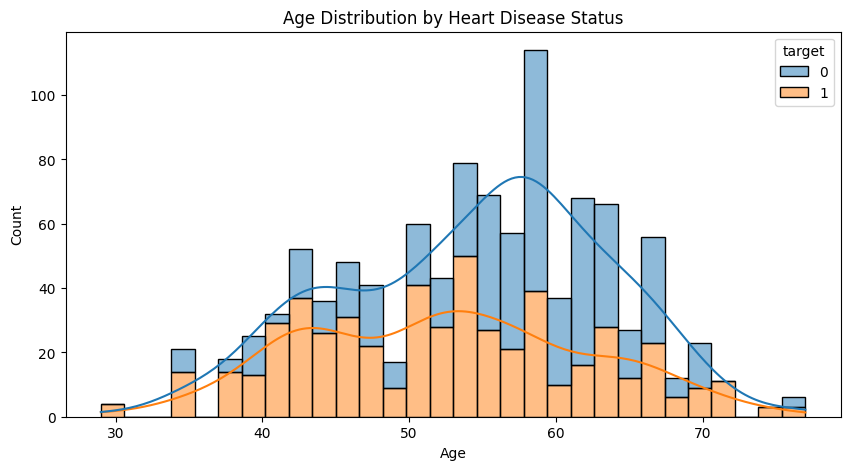

In [288]:
#In summary, this code visualizes how age is distributed among individuals with or without heart disease. 
# It provides a clear, comparative view of the two groups in the dataset. 
plt.figure(figsize=(10,5))
sns.histplot(data=df_heart, x="age", hue="target", multiple="stack", bins=30, kde=True)
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

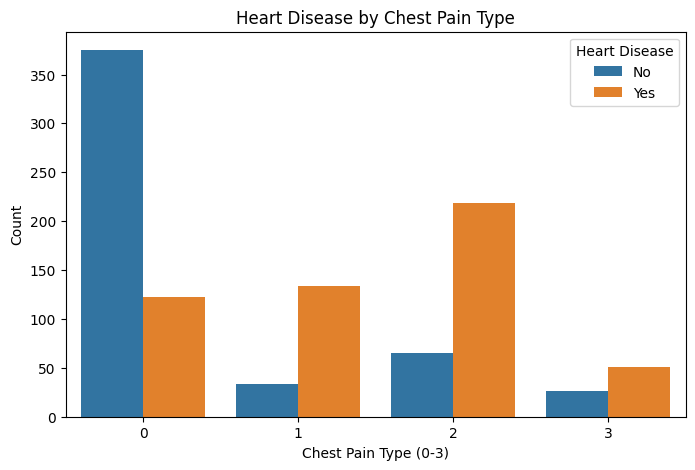

In [289]:
# Chest Pain Type vs. Heart Disease
# This code creates a count plot to visualize the relationship between chest pain type and heart disease status
plt.figure(figsize=(8,5))
sns.countplot(x="cp", hue="target", data=df_heart)
plt.title("Heart Disease by Chest Pain Type")
plt.xlabel("Chest Pain Type (0-3)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

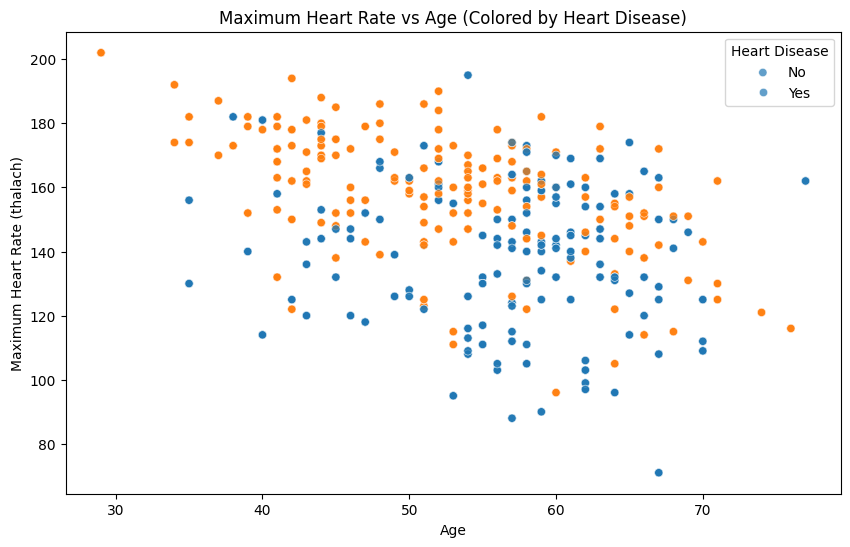

In [290]:
# Maximum Heart Rate vs Age
# This code creates a scatter plot to visualize the relationship between age and maximum heart rate, colored by heart disease status
plt.figure(figsize=(10,6))
sns.scatterplot(x="age", y="thalach", hue="target", data=df_heart, alpha=0.7)
plt.title("Maximum Heart Rate vs Age (Colored by Heart Disease)")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate (thalach)")
plt.legend(title="Heart Disease", labels= ["No", "Yes"])
plt.show()

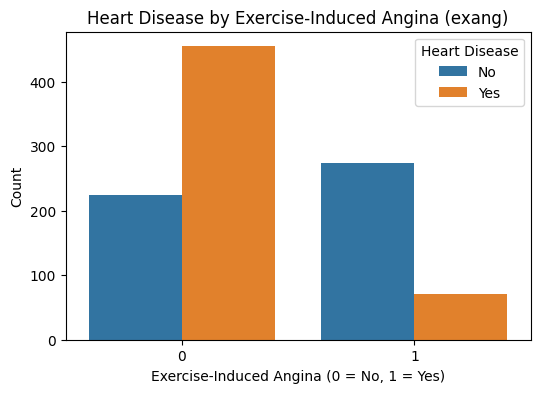

In [291]:
# Exercise-Induced Angina vs. Heart Disease
# This code creates a count plot to visualize the relationship between exercise-induced angina and heart disease status
plt.figure(figsize=(6,4))
sns.countplot(x="exang", hue="target", data=df_heart)
plt.title("Heart Disease by Exercise-Induced Angina (exang)")
plt.xlabel("Exercise-Induced Angina (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

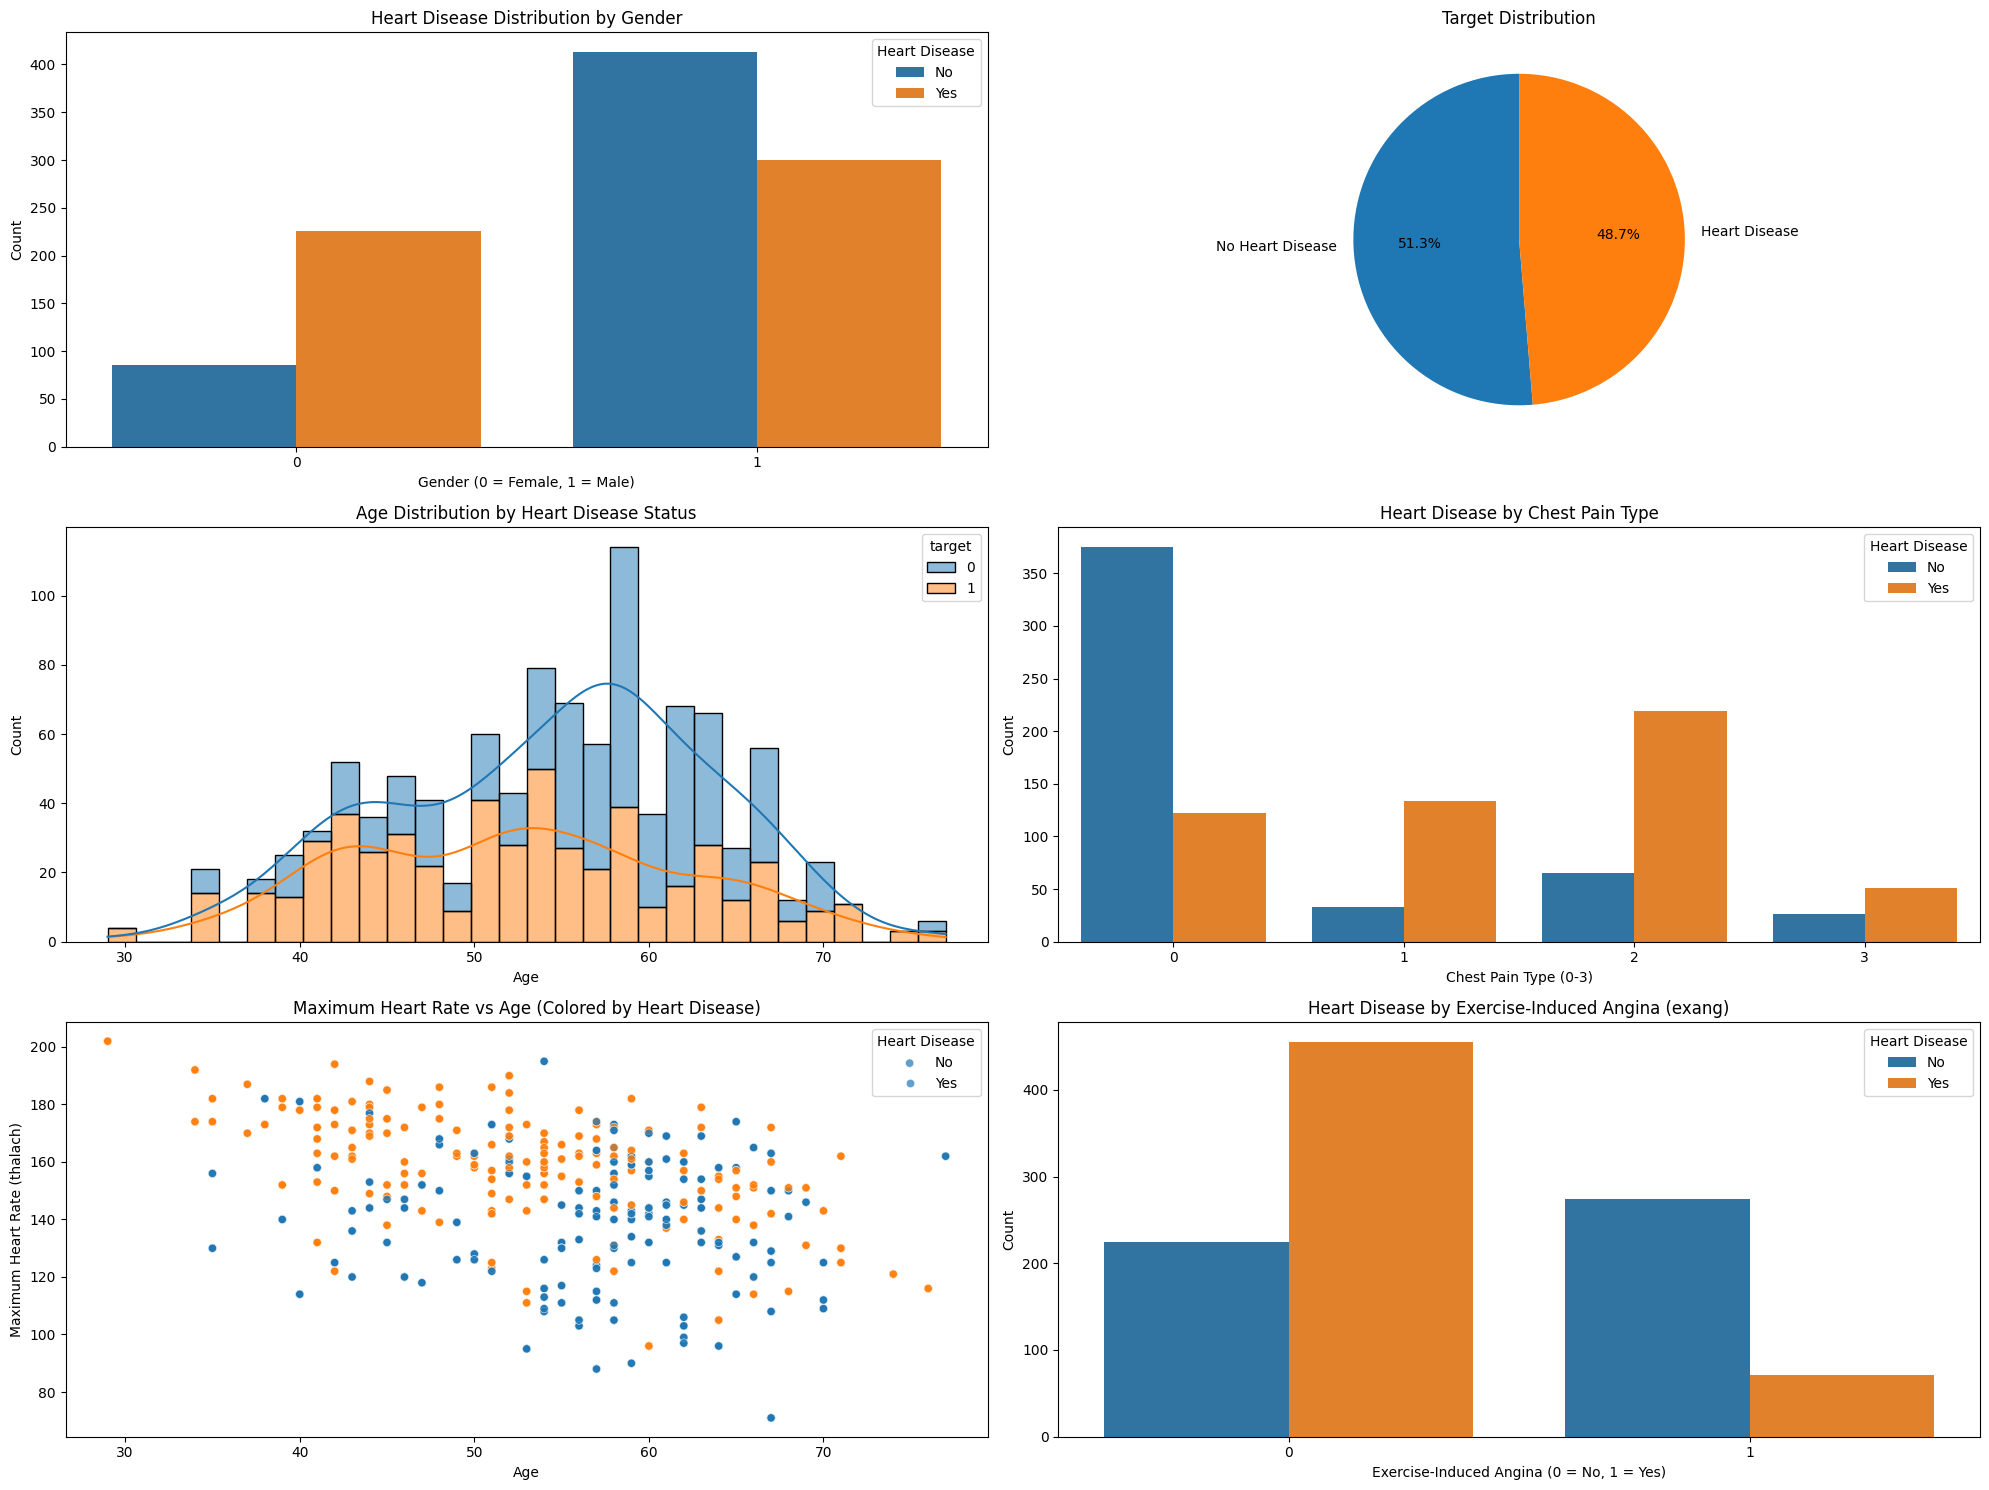

In [292]:

# Assuming df_heart is your DataFrame
# Create a figure with 3 rows and 2 columns of subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

# Plot 1: Heart Disease Distribution by Sex
sns.countplot(x="sex", hue="target", data=df_heart, ax=axes[0, 0])
axes[0, 0].set_title("Heart Disease Distribution by Gender")
axes[0, 0].set_xlabel("Gender (0 = Female, 1 = Male)")
axes[0, 0].set_ylabel("Count")
axes[0, 0].legend(title="Heart Disease", labels=["No", "Yes"])

# Plot 2: Target Distribution (Pie Chart)
target_counts = df_heart["target"].value_counts()
axes[0, 1].pie(target_counts, labels=["No Heart Disease", "Heart Disease"], autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title("Target Distribution")

# Plot 3: Age Distribution by Heart Disease Status
sns.histplot(data=df_heart, x="age", hue="target", multiple="stack", bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Age Distribution by Heart Disease Status")
axes[1, 0].set_xlabel("Age")
axes[1, 0].set_ylabel("Count")

# Plot 4: Heart Disease by Chest Pain Type
sns.countplot(x="cp", hue="target", data=df_heart, ax=axes[1, 1])
axes[1, 1].set_title("Heart Disease by Chest Pain Type")
axes[1, 1].set_xlabel("Chest Pain Type (0-3)")
axes[1, 1].set_ylabel("Count")
axes[1, 1].legend(title="Heart Disease", labels=["No", "Yes"])

# Plot 5: Maximum Heart Rate vs Age (Colored by Heart Disease)
sns.scatterplot(x="age", y="thalach", hue="target", data=df_heart, alpha=0.7, ax=axes[2, 0])
axes[2, 0].set_title("Maximum Heart Rate vs Age (Colored by Heart Disease)")
axes[2, 0].set_xlabel("Age")
axes[2, 0].set_ylabel("Maximum Heart Rate (thalach)")
axes[2, 0].legend(title="Heart Disease", labels=["No", "Yes"])

# Plot 6: Heart Disease by Exercise-Induced Angina (exang)
sns.countplot(x="exang", hue="target", data=df_heart, ax=axes[2, 1])
axes[2, 1].set_title("Heart Disease by Exercise-Induced Angina (exang)")
axes[2, 1].set_xlabel("Exercise-Induced Angina (0 = No, 1 = Yes)")
axes[2, 1].set_ylabel("Count")
axes[2, 1].legend(title="Heart Disease", labels=["No", "Yes"])

# Adjust layout to prevent overlapping elements
plt.tight_layout()
plt.show()

#This code visualises all previous exploratory data analysis (EDA) plots in a single figure with multiple subplots for easier comparison and analysis.


In [293]:
#Create a correlation matrix to understand relationships between numerical features in the dataset.
correlation_matrix = df_heart.corr()

# Display the correlation matrix
print(correlation_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.04

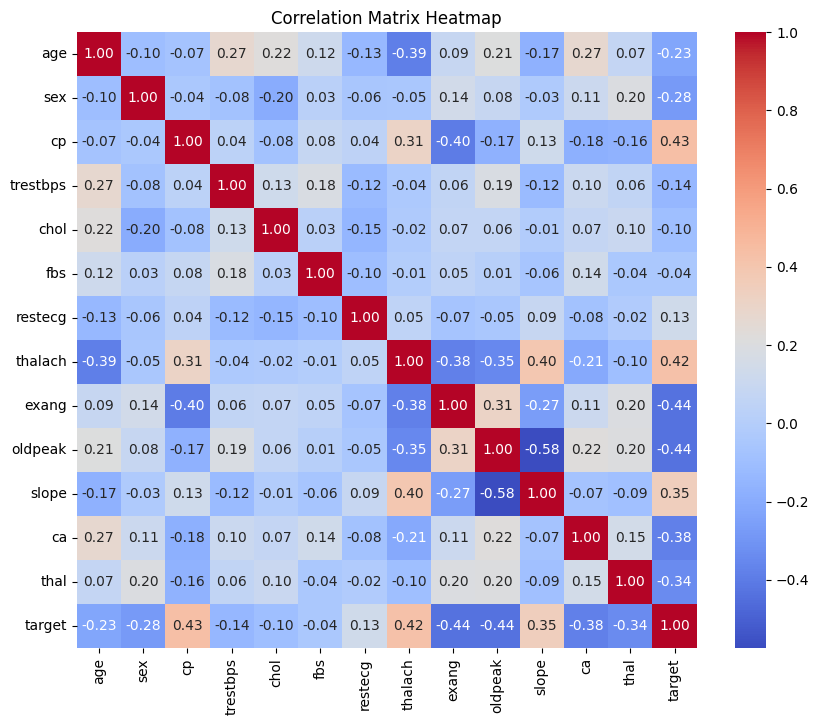

In [294]:
# Plot the heatmap of the correlation matrix to easily identify strong and weak correlations between features.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()
#we can see that 'cp' (chest pain type) and 'thalach' (maximum heart rate achieved) have strong positive correlations with the target variable, indicating their significance in predicting heart disease.

Data Preprocessing

In [295]:
#check the data distribution of target feature 1 = presence of heart disease, 0 = absence of heart disease
df_heart['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [296]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [297]:
#split the data into features and target variable
X = df_heart.drop('target', axis=1)  # Independent features
y = df_heart['target']  # Target feature

In [298]:
# run a Recursive feature elimination with cross-validation to select most optimal features and print results 

# Initialize the classifier 
model = RandomForestClassifier(random_state=42)

# Set up RFECV with 5-fold cross-validation
rfecv = RFECV(estimator=model,
    step=1,  # Number of features to remove at each iteration
    cv=StratifiedKFold(5),  # Cross-validation strategy
    scoring='accuracy',  # Evaluation metric
    )

# Fit RFECV on the dataset
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Selected Features: {X.columns[rfecv.support_]}")


Optimal number of features: 13
Selected Features: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


11 features selected 

['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak','slope', 'ca', 'thal']

Removal of fbs and restecg due to weak correlation with the target variable, reducing model complexity, eliminating noise, mitigate overfitting and enhance predictive accuracy.

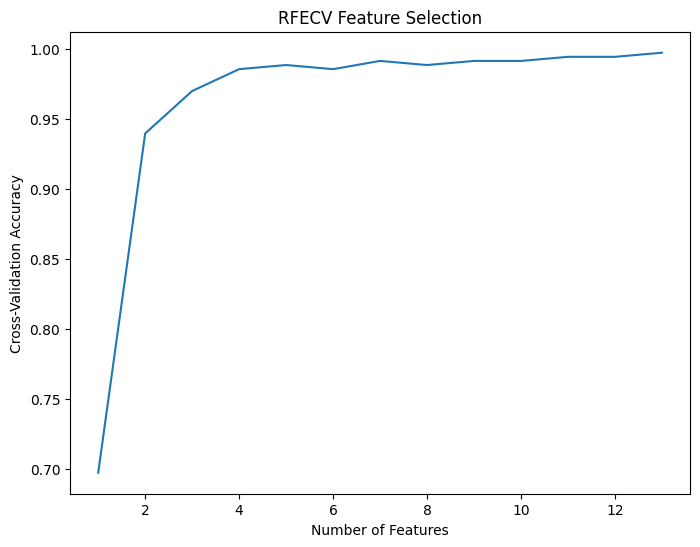

In [299]:
# Plot the mean test scores from cross-validation
plt.figure(figsize=(8, 6))
plt.plot(
    range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
    rfecv.cv_results_['mean_test_score'],
)
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validation Accuracy')
plt.title('RFECV Feature Selection')
plt.show()

In [300]:
# allocating the selected features to a new dataframe df_heart
df_heart = df_heart[['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak','slope', 'ca', 'thal','target']]

df_heart.to_csv('df_heart.csv', index=False)

In [301]:
#Splitting the Features and Target
X = df_heart.drop(columns='target', axis=1)
y = df_heart['target']

In [302]:
# Importing the MinMaxScaler from sklearn.preprocessing this will scale all features to a range between 0 and 1
from sklearn.preprocessing import MinMaxScaler

# Sample dataset
data = df_heart

# Initializing the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))  # The default range is 0 to 1

# Applying the scaler to transform the dataset
scaled_data = scaler.fit_transform(df_heart)

# Display the scaled data
print("Original Data:\n", df_heart)
print("Scaled Data:\n", scaled_data)


Original Data:
       age  sex  cp  trestbps  chol  thalach  exang  oldpeak  slope  ca  thal  \
0      52    1   0       125   212      168      0      1.0      2   2     3   
1      53    1   0       140   203      155      1      3.1      0   0     3   
2      70    1   0       145   174      125      1      2.6      0   0     3   
3      61    1   0       148   203      161      0      0.0      2   1     3   
4      62    0   0       138   294      106      0      1.9      1   3     2   
...   ...  ...  ..       ...   ...      ...    ...      ...    ...  ..   ...   
1020   59    1   1       140   221      164      1      0.0      2   0     2   
1021   60    1   0       125   258      141      1      2.8      1   1     3   
1022   47    1   0       110   275      118      1      1.0      1   1     2   
1023   50    0   0       110   254      159      0      0.0      2   0     2   
1024   54    1   0       120   188      113      0      1.4      1   1     3   

      target  
0       

In [303]:
# Load in scikit-learn functions for constructing logistic regression and splitting the data into training and test sets 
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [304]:
# print shapes of the datasets to verify the split
print(f'Shape of X_Train {X_train.shape}')
print(f'Shape of X_Test {X_test.shape}')
print(f'Shape of Y_Train {y_train.shape}')
print(f'Shape of Y_Test {y_test.shape}')

Shape of X_Train (717, 11)
Shape of X_Test (308, 11)
Shape of Y_Train (717,)
Shape of Y_Test (308,)


Binomial Modelling (Logistical Regression)

In [305]:
# Create and fit the logistic regression model 
clf = linear_model.LogisticRegression().fit(X_train, y_train.values.ravel())
    
# Print the coefficient - the Beta One 
print('Beta One: {0:.2f}'.format(clf.coef_[0][0]))
#_[0][0] is used to extract the value from the 2D array that is returned by the logistic regression model.
# Beta one represents the change in the log-odds of the outcome for a one-unit increase in the predictor variable.

# Print the intercept - the Beta Zero
print('Beta Zero: {0:.2f}'.format(clf.intercept_[0]))
#remember in equation Beta zero is the coefficient sometimes denoted as alpha which denotes the intercept of the model.

Beta One: 0.02
Beta Zero: 0.08


C:\Users\wara_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [306]:
# y_pred is used to store the predicted values for the test set based on the trained logistic regression model.
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,

In [307]:
# Print out the predicted probabilities for the positive class (heart disease present)
np.set_printoptions(suppress = True)
clf.predict_proba(X_test)[::,-1]
#converts 0 and 1s to their actual probabilities showing the likelihood of heart disease presence in the test set.

array([0.96129827, 0.99213384, 0.02432264, 0.94544276, 0.0666869 ,
       0.68458178, 0.00801821, 0.00893144, 0.85970404, 0.02416174,
       0.96546078, 0.0034685 , 0.79990515, 0.92342639, 0.07010975,
       0.94159127, 0.00991688, 0.96995975, 0.81853173, 0.01108707,
       0.77799606, 0.06492138, 0.53867273, 0.00219887, 0.77799606,
       0.66291075, 0.94922527, 0.59258998, 0.00426523, 0.89606802,
       0.66673298, 0.76401506, 0.45185745, 0.99213384, 0.8208542 ,
       0.79452773, 0.77799606, 0.43824771, 0.76967637, 0.92204888,
       0.00893144, 0.05782167, 0.52869951, 0.53867273, 0.17249373,
       0.00122954, 0.09281318, 0.42862179, 0.61687953, 0.52523698,
       0.5350695 , 0.00403464, 0.78134263, 0.03028272, 0.94922527,
       0.76967637, 0.34745218, 0.01057171, 0.9143632 , 0.96547542,
       0.55673759, 0.05062036, 0.00426523, 0.52523698, 0.00283582,
       0.20688688, 0.99615684, 0.69193459, 0.00122954, 0.99186641,
       0.65898311, 0.00426523, 0.43204711, 0.91837325, 0.67058

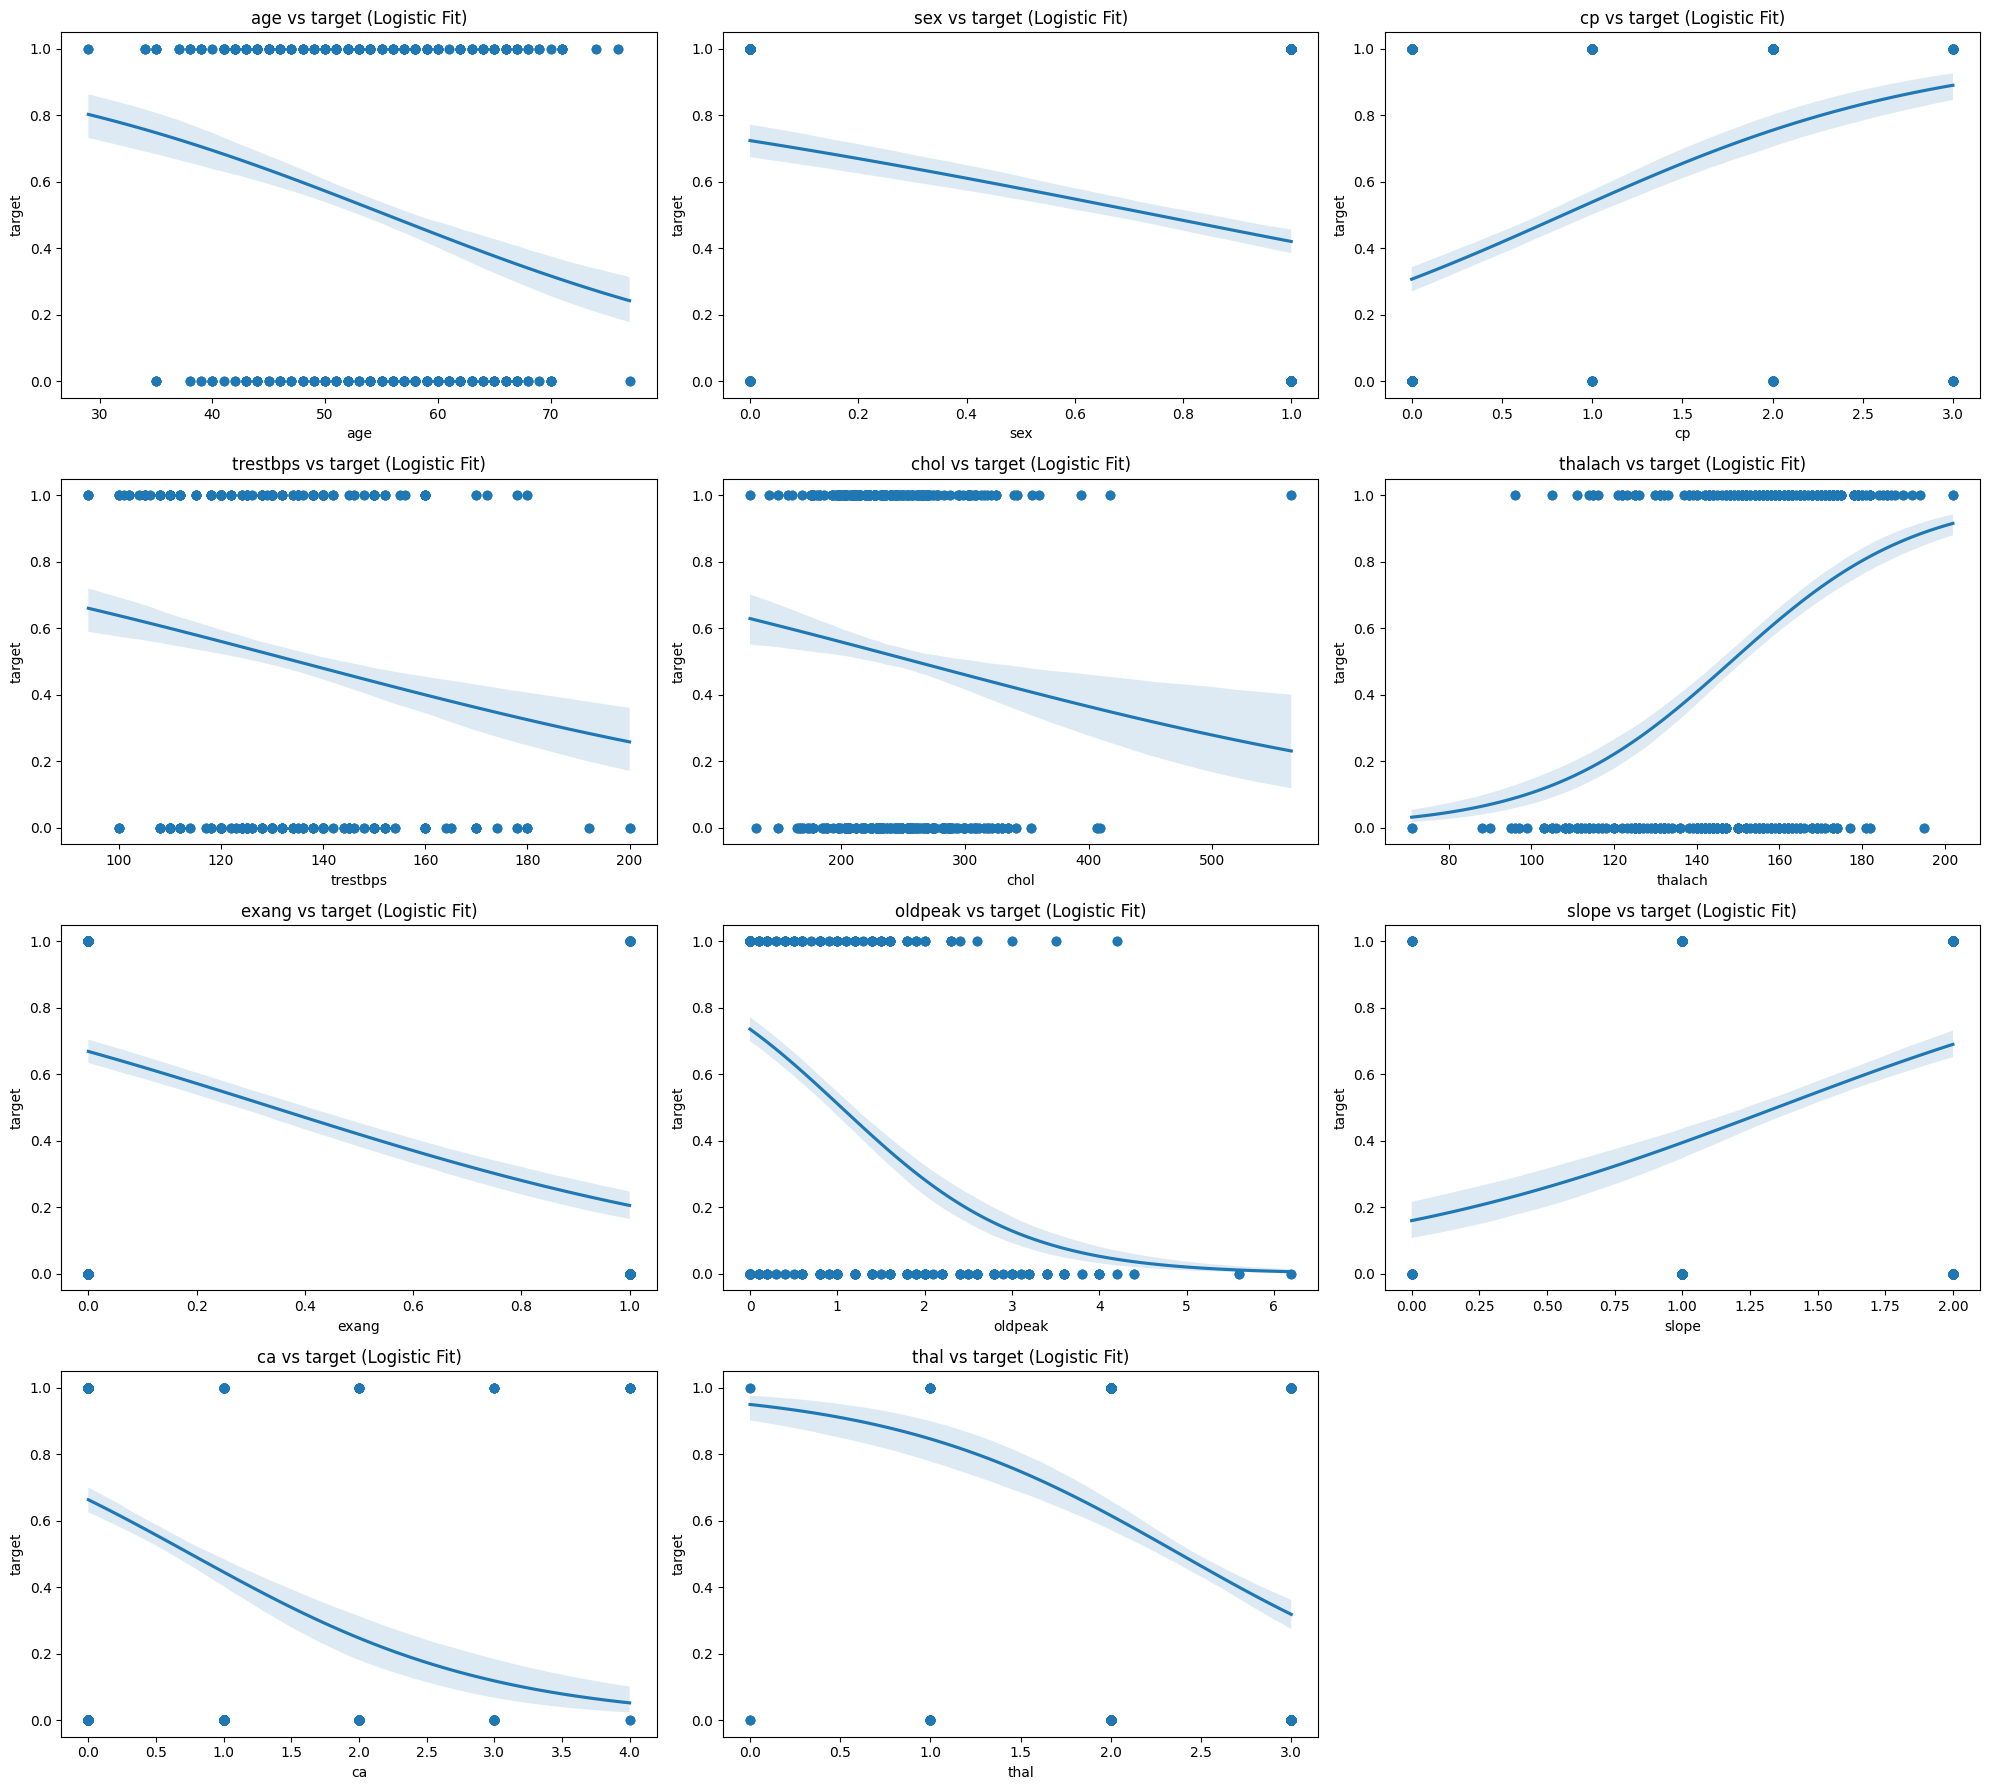

In [308]:
# Visualize Logistic Regression Fits for Each Feature to understand how each feature relates to the target variable.
# Create a 4x3 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(20, 18))
axes = axes.flatten()  # Flatten the array to easily index each subplot

# Plot 1: 'age' vs 'target'
sns.regplot(x="age", y="target", data=df_heart, logistic=True, ax=axes[0])
axes[0].set_title("age vs target (Logistic Fit)")

# Plot 2: 'sex' vs 'target'
sns.regplot(x="sex", y="target", data=df_heart, logistic=True, ax=axes[1])
axes[1].set_title("sex vs target (Logistic Fit)")

# Plot 3: 'cp' vs 'target'
sns.regplot(x="cp", y="target", data=df_heart, logistic=True, ax=axes[2])
axes[2].set_title("cp vs target (Logistic Fit)")

# Plot 4: 'trestbps' vs 'target'
sns.regplot(x="trestbps", y="target", data=df_heart, logistic=True, ax=axes[3])
axes[3].set_title("trestbps vs target (Logistic Fit)")

# Plot 5: 'chol' vs 'target'
sns.regplot(x="chol", y="target", data=df_heart, logistic=True, ax=axes[4])
axes[4].set_title("chol vs target (Logistic Fit)")

# Plot 6: 'thalach' vs 'target'
sns.regplot(x="thalach", y="target", data=df_heart, logistic=True, ax=axes[5])
axes[5].set_title("thalach vs target (Logistic Fit)")

# Plot 7: 'exang' vs 'target'
sns.regplot(x="exang", y="target", data=df_heart, logistic=True, ax=axes[6])
axes[6].set_title("exang vs target (Logistic Fit)")

# Plot 8: 'oldpeak' vs 'target'
sns.regplot(x="oldpeak", y="target", data=df_heart, logistic=True, ax=axes[7])
axes[7].set_title("oldpeak vs target (Logistic Fit)")

# Plot 9: 'slope' vs 'target'
sns.regplot(x="slope", y="target", data=df_heart, logistic=True, ax=axes[8])
axes[8].set_title("slope vs target (Logistic Fit)")

# Plot 10: 'ca' vs 'target'
sns.regplot(x="ca", y="target", data=df_heart, logistic=True, ax=axes[9])
axes[9].set_title("ca vs target (Logistic Fit)")

# Plot 11: 'thal' vs 'target'
sns.regplot(x="thal", y="target", data=df_heart, logistic=True, ax=axes[10])
axes[10].set_title("thal vs target (Logistic Fit)")

# Turn off the last (unused) subplot
axes[11].axis("off")

plt.tight_layout()
plt.show()


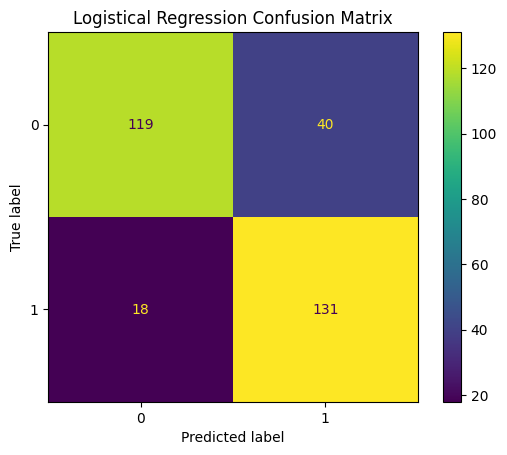

In [309]:
# Import the metrics module from scikit-learn to evaluate the model's performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Display the confusion matrix with a title to show the performance of the logistic regression model on the test set.
disp.plot()
plt.title("Logistical Regression Confusion Matrix")
plt.show()

#top left is true positive, top right is false positive, bottom left is false negative, bottom right is true negative

Precision: 0.766
Recall: 0.879
Accuracy: 0.812
F1 Score: 0.819
ROC AUC Score: 0.814


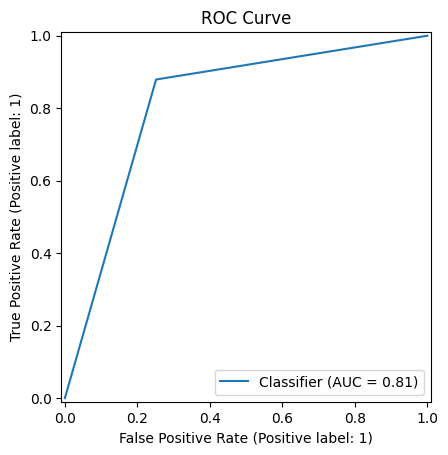

C:\Users\wara_\AppData\Local\Temp\ipykernel_17732\1850032360.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_table = pd.concat([results_table, log_reg_results])


,Model,F1 Score,Recall,Precision,Accuracy
0,Logistic Regression,0.81875,0.879195,0.766082,0.811688


In [310]:
#import various evaluation metrics from sklearn to assess the performance of the logistic regression model.
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, RocCurveDisplay

# Calculate and print metrics for model evaluation
results = {}

# Precision, Recall, Accuracy, F1 Score 
print('Precision: {0:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall: {0:.3f}'.format(recall_score(y_test, y_pred)))
print('Accuracy: {0:.3f}'.format(accuracy_score(y_test, y_pred)))
print('F1 Score: {0:.3f}'.format(f1_score(y_test, y_pred)))

# calculate ROC AUC Score (if relevant for binary classification) ROC AUC is a performance measurement for classification problems at various threshold settings.
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC Score: {0:.3f}'.format(roc_auc))

# Optionally plot the ROC Curve to visualize the model's performance across different classification thresholds.
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.title("ROC Curve")
plt.show()

#create a table to store the results of different models for comparison
results_table = pd.DataFrame(columns=['Model', 'F1 Score', 'Recall', 'Precision', 'Accuracy'])

#add logistic regression results to the table
log_reg_results = pd.DataFrame({'Model': ['Logistic Regression'],
                                'F1 Score': [f1_score(y_test, y_pred)],
                                'Recall': [recall_score(y_test, y_pred)],
                                'Precision': [precision_score(y_test, y_pred)],
                                'Accuracy': [accuracy_score(y_test, y_pred)]})
results_table = pd.concat([results_table, log_reg_results])
results_table

Decision Tree Modelling

Baseline model


In [311]:
# Instantiate the model to use a Decision Tree Classifier
# Import the DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state = 0)
# Fit the model to training data 
decision_tree.fit(X_train, y_train) 
# Make predictions on test data 
dt_pred = decision_tree.predict(X_test)

dt_pred


array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,

In [312]:
# Run the baseline model evaluation and save results for comparison with other models
baseline_results = {}

# Calculate and print metrics for model evaluation
# Precision, Recall, Accuracy, F1 Score
baseline_results['Model'] = 'Decision Tree Classifier'
baseline_results['F1 Score'] = f1_score(y_test, dt_pred)
baseline_results['Recall'] = recall_score(y_test, dt_pred)
baseline_results['Precision'] = precision_score(y_test, dt_pred)
baseline_results['Accuracy'] = accuracy_score(y_test, dt_pred)


# Print out the results for the Decision Tree Classifier
print('Precision: {0:.3f}'.format(baseline_results['Precision']))
print('Recall: {0:.3f}'.format(baseline_results['Recall']))
print('Accuracy: {0:.3f}'.format(baseline_results['Accuracy']))
print('F1 Score: {0:.3f}'.format(baseline_results['F1 Score']))

#plot results in a table 
results_df = pd.DataFrame([baseline_results])

results_df

Precision: 1.000
Recall: 0.940
Accuracy: 0.971
F1 Score: 0.969


,Model,F1 Score,Recall,Precision,Accuracy
0,Decision Tree Classifier,0.968858,0.939597,1.0,0.970779


In [313]:
# Calculate ROC AUC Score 
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC Score: {0:.3f}'.format(roc_auc))


ROC AUC Score: 0.814


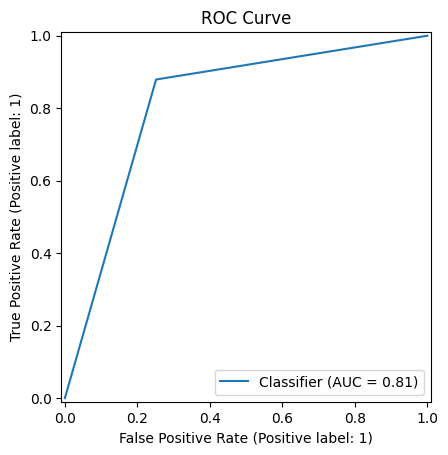

In [314]:
# Optionally plot the ROC Curve
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.title("ROC Curve")
plt.show()


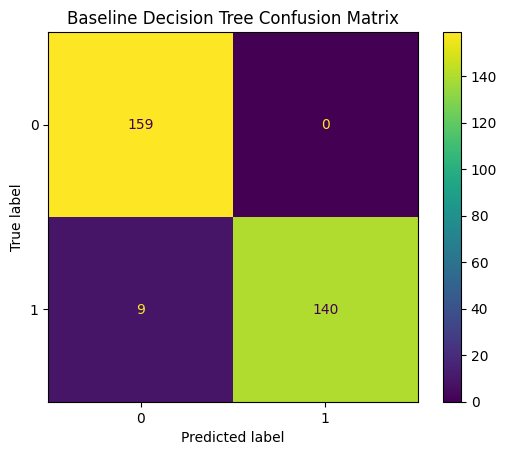

In [315]:
# Helper function for confusion matrix plotting
def conf_matrix_plot(model, X, y):
    model_pred = model.predict(X)
    cm = confusion_matrix(y, model.predict(X))
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    disp.plot(values_format= '')

# Generate confusion matrix
conf_matrix_plot(decision_tree, X_test, y_test)
plt.title("Baseline Decision Tree Confusion Matrix")
plt.show()


[Text(0.5, 0.875, 'cp <= 0.5\ngini = 0.499\nsamples = 717\nvalue = [340, 377]\nclass = Heart Disease'),
 Text(0.25, 0.625, 'ca <= 0.5\ngini = 0.38\nsamples = 345\nvalue = [257, 88]\nclass = No Heart Disease'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'thal <= 2.5\ngini = 0.499\nsamples = 152\nvalue = [72, 80]\nclass = Heart Disease'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'trestbps <= 109.0\ngini = 0.079\nsamples = 193\nvalue = [185, 8]\nclass = No Heart Disease'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'thal <= 2.5\ngini = 0.347\nsamples = 372\nvalue = [83, 289]\nclass = Heart Disease'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'oldpeak <= 2.1\ngini = 0.225\nsamples = 278\nvalue = [36, 242]\nclass = Heart Disease'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'thalach <= 142.5\ngini = 0.5\nsamples

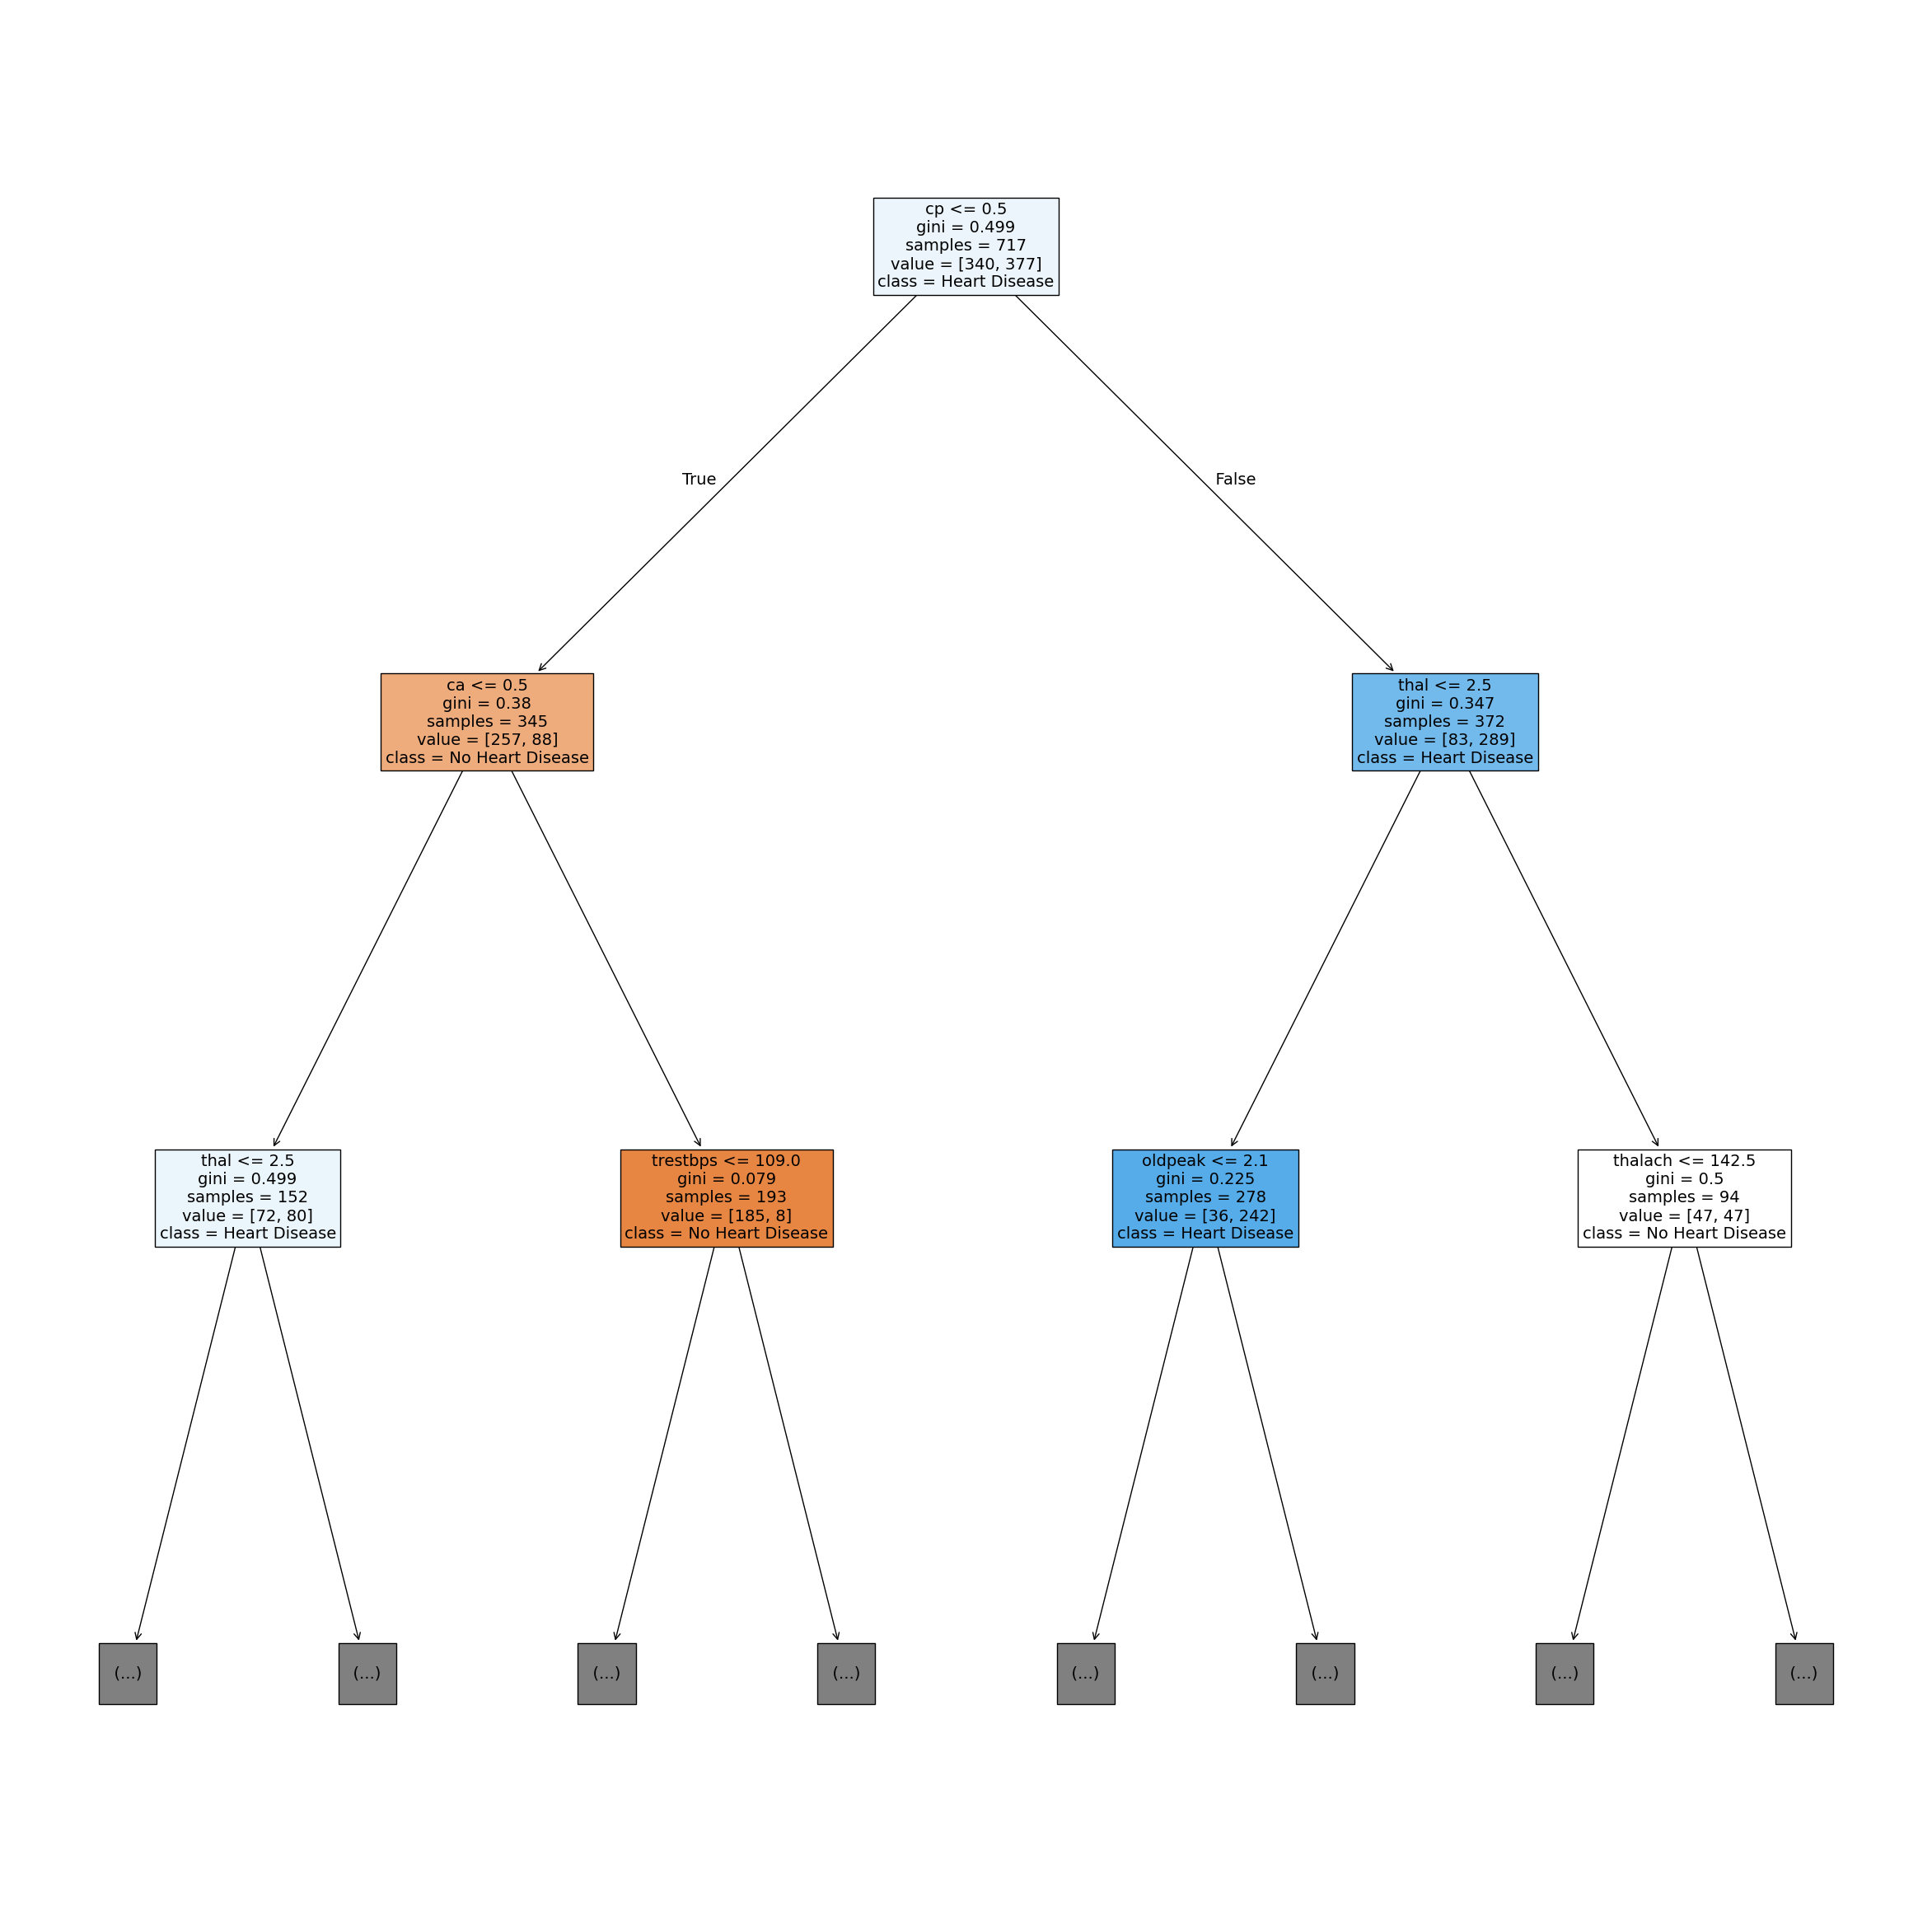

In [316]:

# This function displays the splits of the tree 
from sklearn.tree import plot_tree

# Plot the tree
plt.figure(figsize = (30,30))
plot_tree(decision_tree, max_depth = 2, fontsize = 14, feature_names = X.columns.tolist(), class_names = ['No Heart Disease','Heart Disease'], filled = True)


Fine Tuned via GridSearchCV Decision Tree

In [317]:
# Import GridSearchCV for hyperparameter tuning of the Decision Tree Classifier     
from sklearn.model_selection import GridSearchCV

# Instantiate the classifier for hyperparameter tuning 
tuned_decision_tree = DecisionTreeClassifier(random_state = 42)

# Assign a dictionary of hyperparameters to search over     
tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,60,70,80,90,100],
             'min_samples_leaf': [2, 5, 10, 20, 50]}

# Assign a set of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearch with cross-validation 
clf = GridSearchCV(tuned_decision_tree, tree_para, scoring = scoring , cv = 5, refit = 'f1')
# Fit the model 
clf.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': [4, 5, ...], 'min_samples_leaf': [2, 5, ...]}"
,scoring,"['accuracy', 'precision', ...]"
,n_jobs,None
,refit,'f1'
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


[Text(0.5290178571428571, 0.9545454545454546, 'cp <= 0.5\ngini = 0.499\nsamples = 717\nvalue = [340, 377]\nclass = Heart Disease'),
 Text(0.28794642857142855, 0.8636363636363636, 'ca <= 0.5\ngini = 0.38\nsamples = 345\nvalue = [257, 88]\nclass = No Heart Disease'),
 Text(0.4084821428571428, 0.9090909090909092, 'True  '),
 Text(0.18303571428571427, 0.7727272727272727, 'thal <= 2.5\ngini = 0.499\nsamples = 152\nvalue = [72, 80]\nclass = Heart Disease'),
 Text(0.08035714285714286, 0.6818181818181818, 'thalach <= 119.5\ngini = 0.339\nsamples = 88\nvalue = [19, 69]\nclass = Heart Disease'),
 Text(0.0625, 0.5909090909090909, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = No Heart Disease'),
 Text(0.09821428571428571, 0.5909090909090909, 'exang <= 0.5\ngini = 0.28\nsamples = 83\nvalue = [14.0, 69.0]\nclass = Heart Disease'),
 Text(0.03571428571428571, 0.5, 'chol <= 316.5\ngini = 0.07\nsamples = 55\nvalue = [2, 53]\nclass = Heart Disease'),
 Text(0.017857142857142856, 0.4090909090909091, 'g

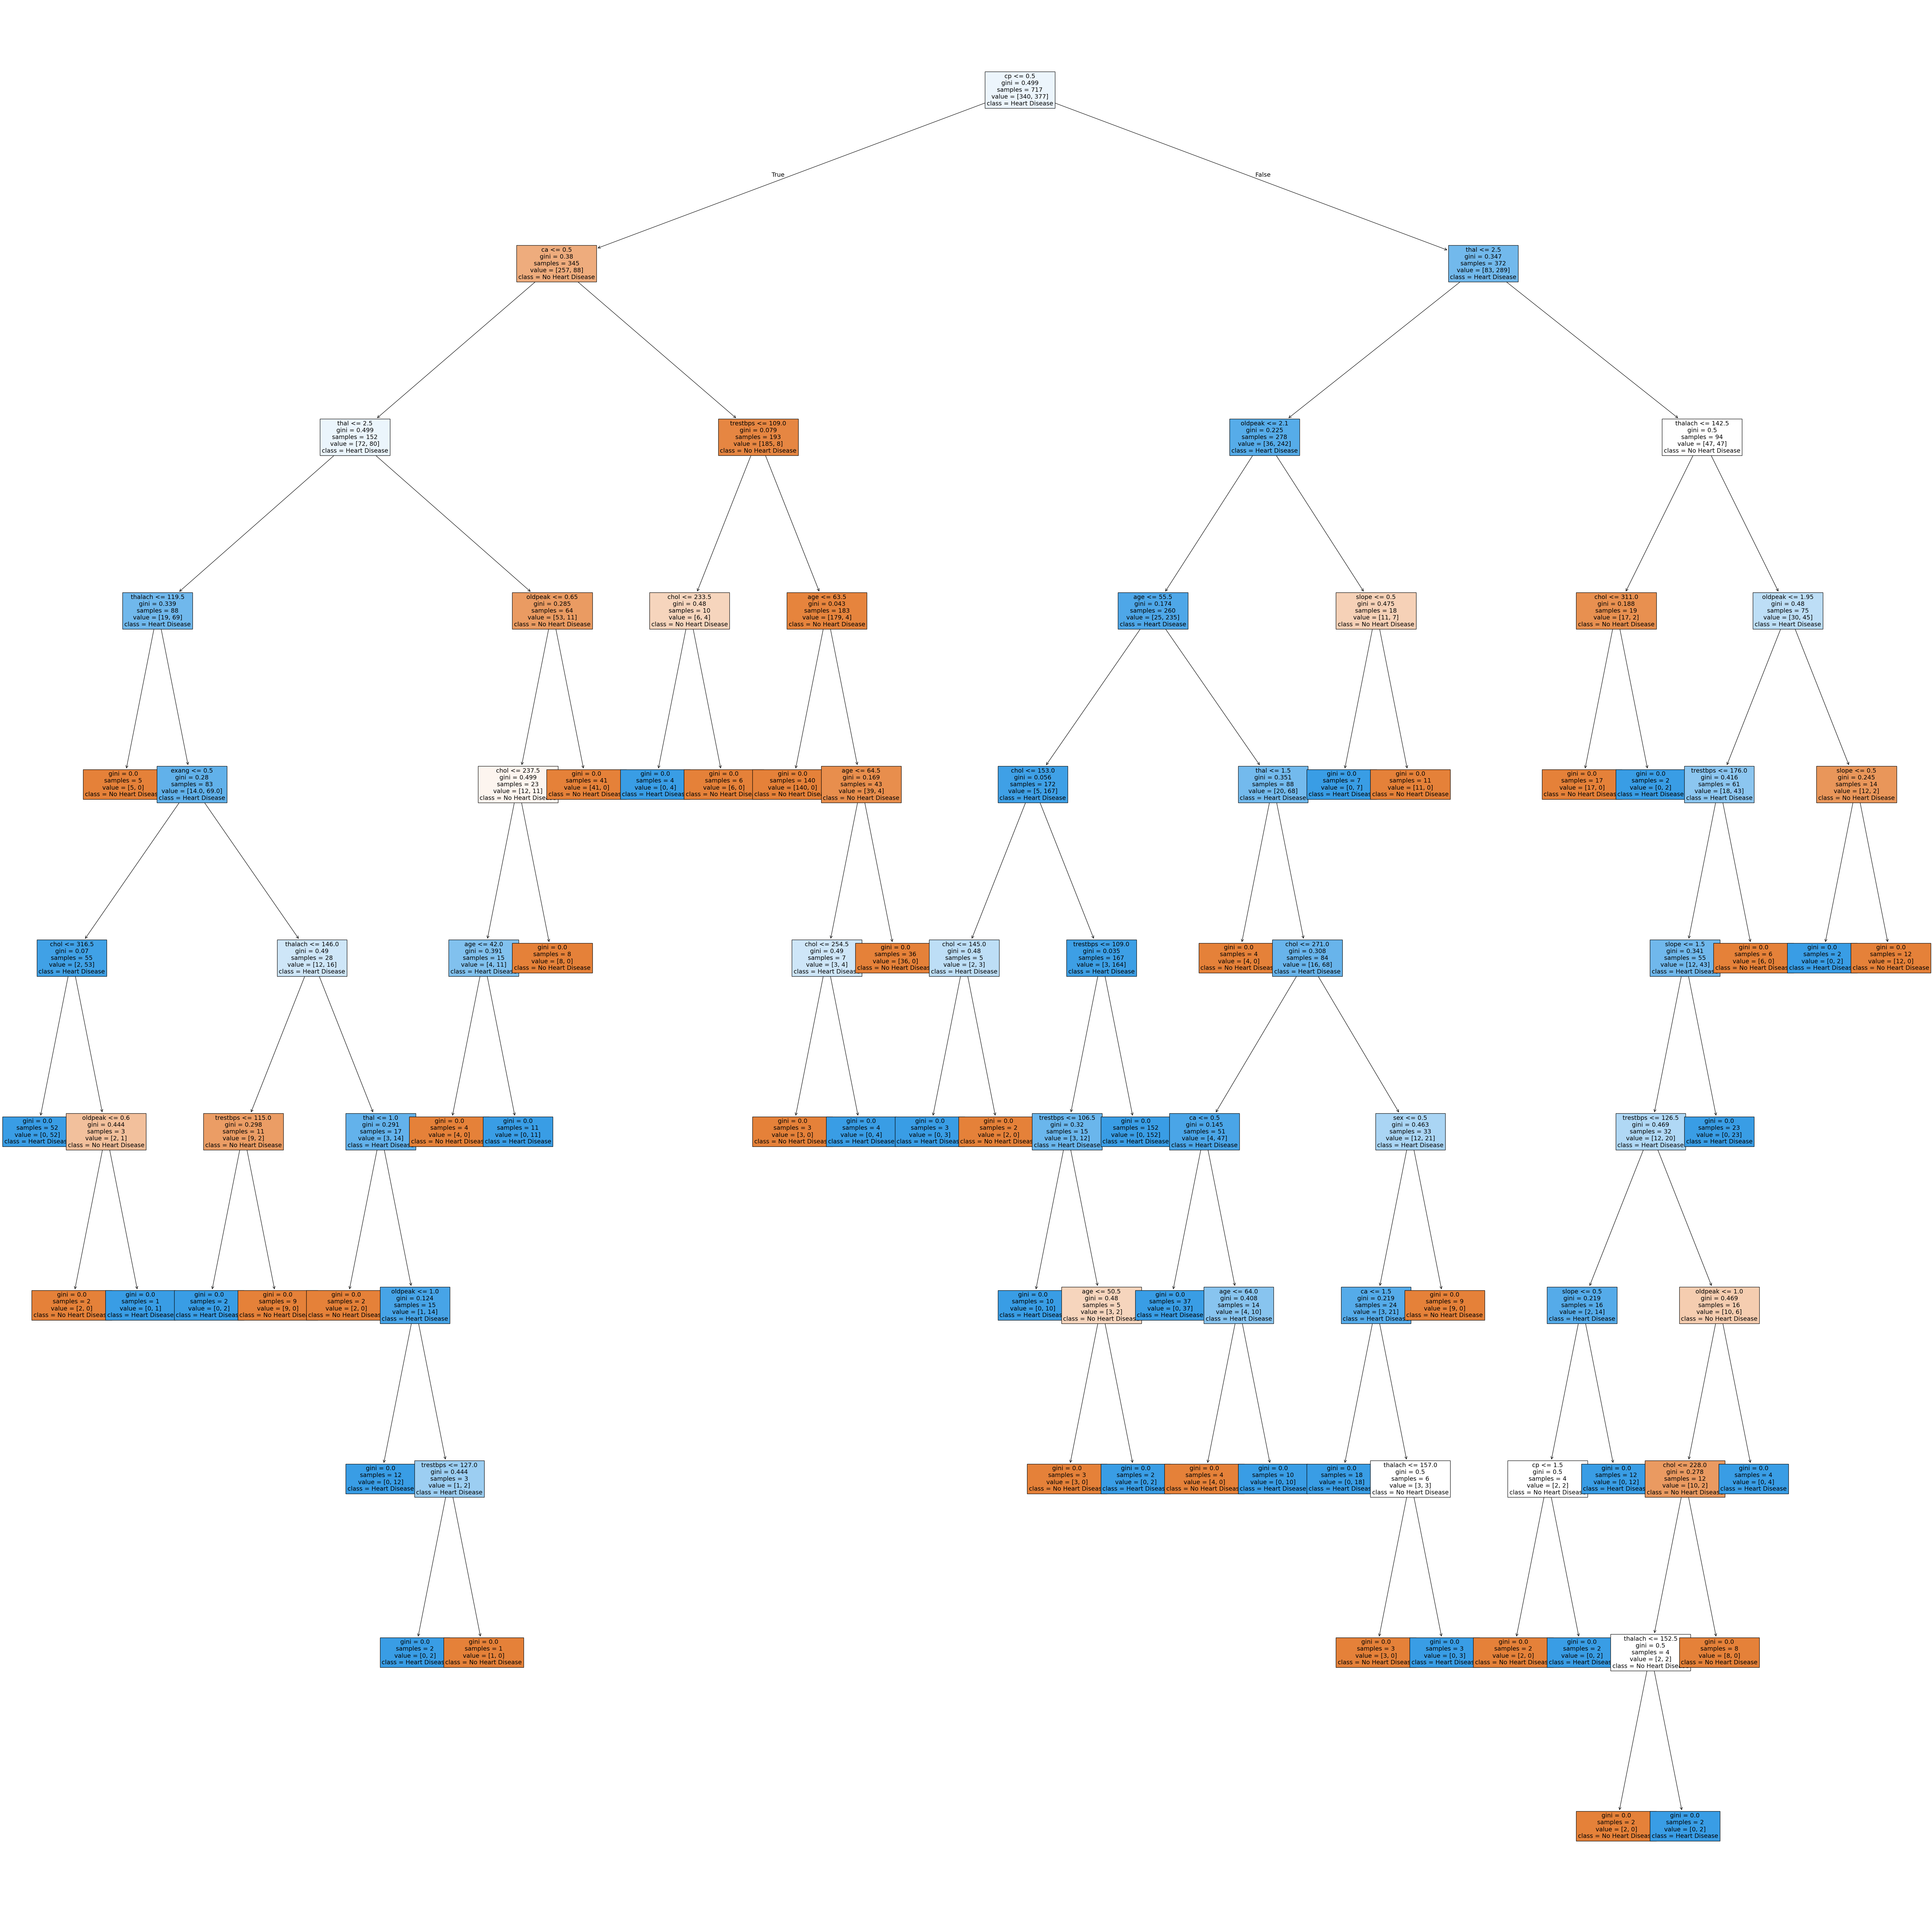

In [318]:
from sklearn.tree import DecisionTreeClassifier

# This function displays the splits of the tree
from sklearn.tree import plot_tree

# Plot the tree
plt.figure(figsize = (80,80))
plot_tree(decision_tree, max_depth =11, fontsize = 14, feature_names = X.columns.tolist(), class_names = ['No Heart Disease','Heart Disease'], filled = True)


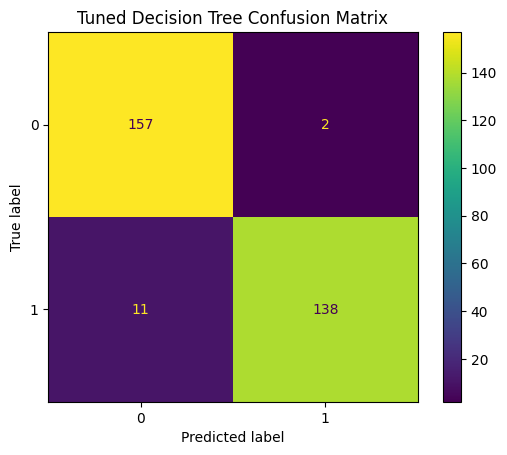

In [319]:
# Generate confusion matrix for the tuned decision tree
conf_matrix_plot(clf, X_test, y_test)
plt.title("Tuned Decision Tree Confusion Matrix")
plt.show()

In [320]:
# Examine the best model from GridSearch
clf.best_estimator_

,criterion,'gini'
,splitter,'best'
,max_depth,11
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [321]:
# Print Best Avg. Valiidation Score  
clf.best_score_

np.float64(0.9398102221038505)

In [322]:
# Helper function for results
def make_results(model_name, model_object):
    cv_results = pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(),:]
    
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision 
    accuracy = best_estimator_results.mean_test_accuracy
   
    

    table = pd.DataFrame()
    table = pd.DataFrame({'Model': [model_name],
                          'F1 Score': [f1],
                          'Accuracy': [accuracy],
                          'Precision': [precision],
                          'Recall': [recall]})
    return table

In [323]:
# Call the function on our model and save the results 
results_table = pd.concat([results_table, make_results('Tuned Decision Tree', clf)])

results_table

,Model,F1 Score,Recall,Precision,Accuracy
0,Logistic Regression,0.81875,0.879195,0.766082,0.811688
0,Tuned Decision Tree,0.93981,0.925474,0.955908,0.938549


In [324]:

#concatenate the results of the tuned decision tree with the baseline decision tree results for comparison
results_table = pd.concat([results_df, results_table])
results_table

,Model,F1 Score,Recall,Precision,Accuracy
0,Decision Tree Classifier,0.968858,0.939597,1.000000,0.970779
0,Logistic Regression,0.818750,0.879195,0.766082,0.811688
0,Tuned Decision Tree,0.939810,0.925474,0.955908,0.938549


Random Forest Modelling

In [325]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# This module lets us save our models once we fit them.
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, scoring={'f1': 'f1', 'recall': 'recall', 'precision': 'precision', 'accuracy': 'accuracy'}, refit = 'f1', cv=5)
rf_cv.fit(X_train, y_train)
rf_cv.best_params_


def make_results(model_name, model_object):
    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract f1 score from that row (other metrics are not available with scoring='f1')
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1 Score': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )
    
    return table

rf_cv_results = make_results('Random Forest CV', rf_cv)
rf_cv_results

,Model,F1 Score,Recall,Precision,Accuracy
0,Random Forest CV,0.971238,0.981404,0.96149,0.969308


In [326]:
results_table = pd.concat([results_table, rf_cv_results])
results_table

,Model,F1 Score,Recall,Precision,Accuracy
0,Decision Tree Classifier,0.968858,0.939597,1.000000,0.970779
0,Logistic Regression,0.818750,0.879195,0.766082,0.811688
0,Tuned Decision Tree,0.939810,0.925474,0.955908,0.938549
0,Random Forest CV,0.971238,0.981404,0.961490,0.969308


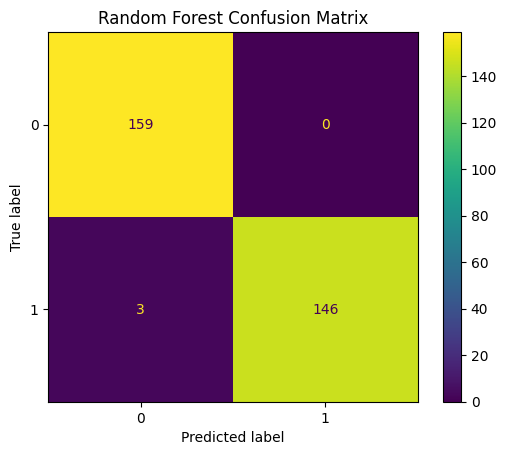

In [327]:
conf_matrix_plot(rf_cv, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

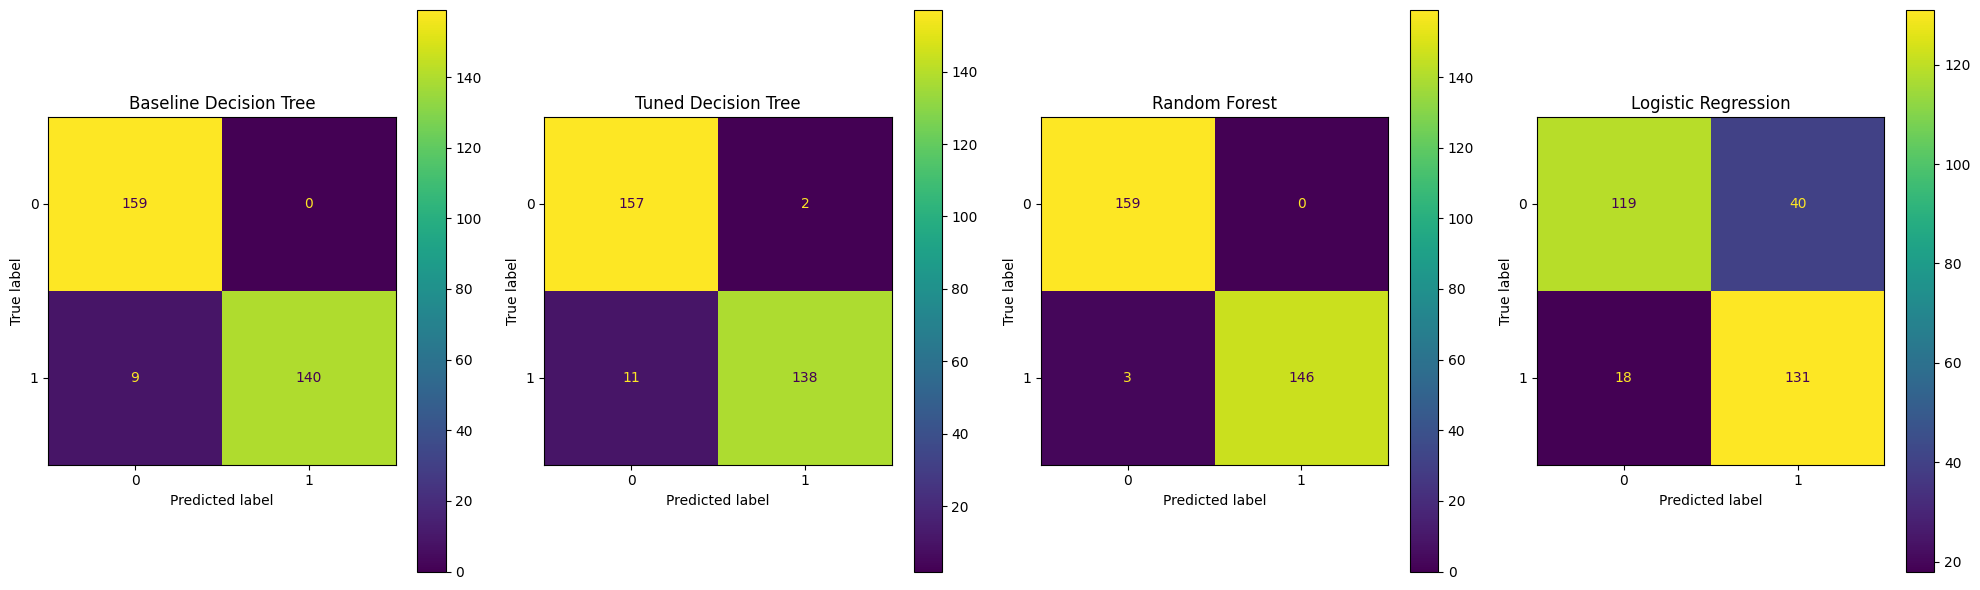

In [328]:
#create a visualisation of all confusion matrices for the four models used in this project
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

models = [decision_tree, clf, rf_cv]
titles = ['Baseline Decision Tree', 'Tuned Decision Tree', 'Random Forest', 'Logistic Regression']

# Plot confusion matrices for the three model objects
for ax, model, title in zip(axes[:3], models, titles[:3]):
    cm = confusion_matrix(y_test, model.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=ax, values_format='')
    ax.set_title(title)

# Plot confusion matrix for logistic regression using y_pred
cm_logreg = confusion_matrix(y_test, y_pred)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=[0, 1])
disp_logreg.plot(ax=axes[3], values_format='')
axes[3].set_title(titles[3])

plt.tight_layout()
plt.show()
    